In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 

In [3]:
dfprofile = pd.read_json('../data/profile.json', orient= 'records', lines = True)
dfprofile.shape

(17000, 5)

In [4]:
dfprofile.sample(10, random_state = 0)

,gender,age,id,became_member_on,income
3873,F,35,b743f13d0b9f4ae0b529bb65615f7e52,20160430,34000.0
3625,F,35,a9ef494d007245e9b94c2ff661859c51,20151018,45000.0
3028,M,42,d8f121893be243f3a8851129a828beee,20180705,56000.0
13814,None,118,9da33731c69f4d838d8dacc2f041d538,20141111,NaN
15398,M,39,646797fb6f194a698086d585c7d60cc3,20170328,61000.0
13244,M,54,e068cefa9e104dff830da55b9b8e4ff7,20170721,63000.0
2516,F,76,84a64f55640543db95c7f53a460fcb39,20171224,57000.0
3008,O,49,6db6c774200b4c99bdbd8e7e2ab98b31,20171122,80000.0
2619,M,70,759c2269abc44dfdb8e6d140d4060856,20170517,113000.0
2525,F,73,e928e0783c9c473c9e1648f430b489e6,20171226,49000.0


In [5]:
dfprofile.dtypes

gender               object
age                   int64
id                   object
became_member_on      int64
income              float64
dtype: object

In [6]:
dfprofile['became_member_on'] = dfprofile['became_member_on'].astype(str)

In [7]:
dfprofile['member_since'] = pd.to_datetime(dfprofile['became_member_on'])
dfprofile['member_year'] = dfprofile['member_since'].dt.year
dfprofile['member_month'] = dfprofile['member_since'].dt.month

In [8]:
dfprofile.sample(10, random_state = 0)

,gender,age,id,became_member_on,income,member_since,member_year,member_month
3873,F,35,b743f13d0b9f4ae0b529bb65615f7e52,20160430,34000.0,2016-04-30,2016,4
3625,F,35,a9ef494d007245e9b94c2ff661859c51,20151018,45000.0,2015-10-18,2015,10
3028,M,42,d8f121893be243f3a8851129a828beee,20180705,56000.0,2018-07-05,2018,7
13814,None,118,9da33731c69f4d838d8dacc2f041d538,20141111,NaN,2014-11-11,2014,11
15398,M,39,646797fb6f194a698086d585c7d60cc3,20170328,61000.0,2017-03-28,2017,3
13244,M,54,e068cefa9e104dff830da55b9b8e4ff7,20170721,63000.0,2017-07-21,2017,7
2516,F,76,84a64f55640543db95c7f53a460fcb39,20171224,57000.0,2017-12-24,2017,12
3008,O,49,6db6c774200b4c99bdbd8e7e2ab98b31,20171122,80000.0,2017-11-22,2017,11
2619,M,70,759c2269abc44dfdb8e6d140d4060856,20170517,113000.0,2017-05-17,2017,5
2525,F,73,e928e0783c9c473c9e1648f430b489e6,20171226,49000.0,2017-12-26,2017,12


In [9]:
# derived features from `became_member_on` look fine. Will delete it
del dfprofile['became_member_on']

In [10]:
count_year = dfprofile['member_year'].value_counts(dropna = False).sort_index()
count_year

2013     286
2014     691
2015    1830
2016    3526
2017    6469
2018    4198
Name: member_year, dtype: int64

<AxesSubplot:>

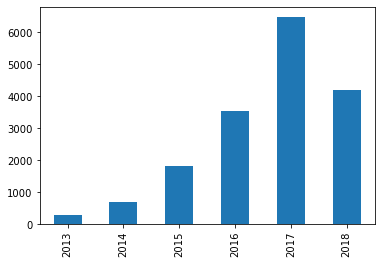

In [11]:
count_year.plot.bar()

In [12]:
count_month = dfprofile['member_month'].value_counts(dropna = False).sort_index()
count_month

1     1525
2     1202
3     1329
4     1315
5     1307
6     1265
7     1359
8     1610
9     1515
10    1568
11    1449
12    1556
Name: member_month, dtype: int64

<AxesSubplot:>

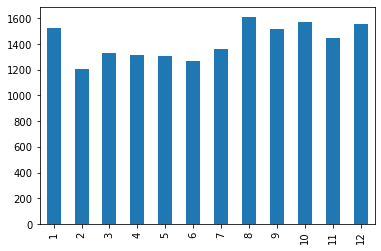

In [13]:
count_month.plot.bar()

The month is practically normally distributed. I will not consider using it for my analysis.

<AxesSubplot:>

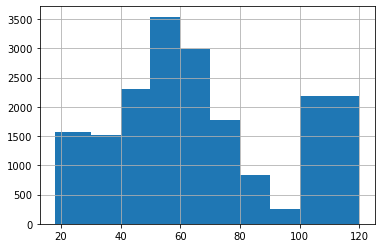

In [14]:
bins = [18.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100., 120.]
dfprofile['age'].hist(bins = bins)

In [15]:
dfprofile['age'].loc[dfprofile['age'] > 90].shape

(2394,)

So, there are 2394 people above age of 90 in our sample. Let's investigate, eespecially those who are above 100 look suspcicious, their count is even higher than people within 20 to 40. That's indeed strange.

In [16]:
dfprofile['age'].loc[dfprofile['age'] > 90].value_counts().sort_index()

91       47
92       40
93       29
94       33
95       22
96        8
97       13
98        5
99        5
100      12
101       5
118    2175
Name: age, dtype: int64

In [17]:
# There is no NaN value in the age columns
dfprofile['age'].isna().sum()

0

Ok. Makes better sense. I assume 118 is code for missing value for age; notice that there is no NA in age which makes my assumption stronger. I'm also gonna go and code all people above age 91 as missing value, since I don't trust that is the correct age. Ideally I would have talked to the people responsible for gather the data, but you have to do with what you got.

In [18]:
dfprofile.loc[dfprofile['age'] == 118].sample(10, random_state = 0)

,gender,age,id,income,member_since,member_year,member_month
1415,None,118,bea39bf06adf4610b588deaba0bd791c,NaN,2017-07-31,2017,7
16994,None,118,c02b10e8752c4d8e9b73f918558531f7,NaN,2015-12-11,2015,12
3356,None,118,57b6daacc3d746f68e57bb2180b6f8a1,NaN,2016-06-12,2016,6
6631,None,118,259049daa72f43b29bba5758db435f9d,NaN,2018-05-08,2018,5
12403,None,118,cc82a0a1f09d40c1ac79d5b1d844cc9b,NaN,2018-03-03,2018,3
7203,None,118,4ea6324f760d40b3bd6b44d660e7bf1c,NaN,2017-10-02,2017,10
4439,None,118,48f7bc851d79485aba255b24325f4649,NaN,2018-02-21,2018,2
5505,None,118,8109d451a16e4e2690383f084e575a57,NaN,2016-03-14,2016,3
7534,None,118,b709b164f64d4af58d28e601575bf48b,NaN,2018-05-16,2018,5
14047,None,118,2d35e6cbece34ef2b6f9240972b52831,NaN,2018-03-27,2018,3


So, since people of age 118 are have no value for gender and income, it's safe to assume age of `118` is code for `NA`. I'm not sure if much value could be drived out of those people since the only information available about them is the date they became a member.

In [19]:
#dfprofile['age'].apply(lambda x: [n if n < 90 else np.nan for n in x])
# https://stackoverflow.com/questions/43757977/replacing-values-greater-than-a-number-in-pandas-dataframe

# If age is above 90, code it as NA:
age_clean = np.array(dfprofile['age'].values.tolist())
dfprofile['age_cleaned'] = np.where(age_clean > 90, np.nan, age_clean).tolist()

In [20]:
count_gender = dfprofile['gender'].value_counts(dropna = False)
count_gender

M      8484
F      6129
NaN    2175
O       212
Name: gender, dtype: int64

<AxesSubplot:>

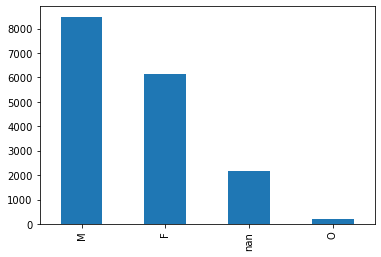

In [21]:
count_gender.plot.bar()

Because there are only 212 people with `O` as gender, I'll code them as `NA`. 

In [22]:
dfprofile['gender'].loc[dfprofile['gender'] == 'O'] = np.nan



C:\Users\Heschmat\miniconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [23]:
dfprofile['gender'].value_counts(dropna = False)

M      8484
F      6129
NaN    2387
Name: gender, dtype: int64

In [24]:
dfprofile['income'].isna().sum()

2175

<AxesSubplot:>

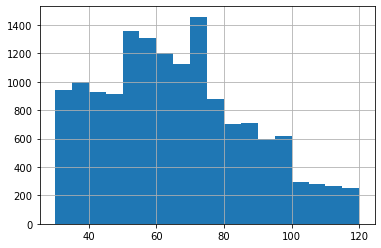

In [25]:
dfprofile['income_thaousand'] = dfprofile['income'] / 1000

bins = np.arange(30, 120 + 1, 5)
dfprofile['income_thaousand'].hist(bins = bins)

In [26]:
dfprofile['income_thaousand'].describe()

count    14825.000000
mean        65.404992
std         21.598299
min         30.000000
25%         49.000000
50%         64.000000
75%         80.000000
max        120.000000
Name: income_thaousand, dtype: float64

So, the income is right skewed

In [27]:
dfprofile[['gender', 'income']].groupby('gender').describe().round()

income                                                                
         count     mean      std      min      25%      50%      75%       max
gender                                                                        
F       6129.0  71306.0  22338.0  30000.0  54000.0  71000.0  88000.0  120000.0
M       8484.0  61195.0  20070.0  30000.0  45000.0  59000.0  73000.0  120000.0

In [28]:
dfprofile[['gender', 'age_cleaned']].groupby('gender').describe().round()

age_cleaned                                          
             count  mean   std   min   25%   50%   75%   max
gender                                                      
F           5993.0  57.0  16.0  18.0  47.0  58.0  68.0  90.0
M           8403.0  52.0  17.0  18.0  39.0  53.0  64.0  90.0

So, on average, women in this dataset, are younger and tend to earn less.

In [30]:
# Save the intermediate data

dfprofile.to_pickle('../data_intermediate/profile.pkl')